# Store sales data analysis:


# Library uploading:
#### We need first to upload the packages that we are going to work with in our data analysis process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Data gathering:

In [2]:
sales = pd.read_csv('sales_data.csv', sep=';')

# Data assessing:
#### We have to assess our data visually and programmatically for the aim of giving us a sense of the data and too check if there is a data quality or tidiness issues that need to be fixed.

In [3]:
sales.head()

,order_id,product,quantity,unit_price,date,shipping_adress
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         185950 non-null  int64  
 1   product          185950 non-null  object 
 2   quantity         185950 non-null  int64  
 3   unit_price       185950 non-null  float64
 4   date             185950 non-null  object 
 5   shipping_adress  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [5]:
sales.describe()

,order_id,quantity,unit_price
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [6]:
sales.sample(20)

,order_id,product,quantity,unit_price,date,shipping_adress
815,177337,AAA Batteries (4-pack),1,2.99,04/15/19 18:17,"975 Sunset St, Seattle, WA 98101"
182863,256376,27in FHD Monitor,1,149.99,09/16/19 10:46,"231 5th St, Los Angeles, CA 90001"
22705,240927,AA Batteries (4-pack),2,3.84,08/13/19 22:33,"856 Elm St, New York City, NY 10001"
78765,224715,Macbook Pro Laptop,1,1700.00,07/11/2019 22:04,"706 2nd St, Portland, OR 97035"
30550,295950,AA Batteries (4-pack),1,3.84,12/31/19 09:15,"789 14th St, Boston, MA 02215"
79145,225080,iPhone,1,700.00,07/17/19 19:21,"520 Park St, Los Angeles, CA 90001"
87717,233320,34in Ultrawide Monitor,1,379.99,07/17/19 20:48,"323 Main St, Los Angeles, CA 90001"
52882,317399,20in Monitor,1,109.99,12/29/19 16:48,"215 Ridge St, Portland, OR 97035"
67002,161800,20in Monitor,1,109.99,02/28/19 09:21,"572 12th St, New York City, NY 10001"
130296,204012,Wired Headphones,1,11.99,05/14/19 08:19,"511 Highland St, New York City, NY 10001"


In [7]:
sales.duplicated().sum()

264

## Quality issues:
### 1. Date column type has to be datetime not object.
### 2. There is some duplicated rows that need to be dropped.
## Data augmenting:
### 1. Get new columns (day, month, hour) for each row form the date column.
### 2. Get an order value column by multiplaying the quantity by the unite price.
### 3. Get the city column from the shipping adress.


# Data processing:
## Quality issues:
### 1. Date column type has to be datetime not object.
#### Code:

In [8]:
sales['date'] = pd.to_datetime(sales.date) 

#### Test: 

In [9]:
sales.dtypes

order_id                    int64
product                    object
quantity                    int64
unit_price                float64
date               datetime64[ns]
shipping_adress            object
dtype: object

### 2. There is some duplicated rows that need to be dropped.
#### Code:

In [10]:
sales.drop_duplicates(subset=None, keep="first", inplace=True)

#### Test:

In [11]:
sales.duplicated().sum()

0

## Data augmenting:
### 1. Get new columns (day, month, hour) for each row form the date column.
#### Code:

In [12]:
sales['month'] = sales.date.dt.month


In [13]:
sales['day'] = sales['date'].dt.day_name()


In [14]:
sales['hour'] = sales.date.dt.hour


#### Test:

In [15]:
sales.head(1)

,order_id,product,quantity,unit_price,date,shipping_adress,month,day,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Friday,8


### 2. Get an order value column by multiplaying the quantity by the unite price.
#### Code:


In [16]:
sales['order_value'] = sales['quantity'].astype('int') * sales['unit_price'].astype('float')


In [17]:
sales.head(1)

,order_id,product,quantity,unit_price,date,shipping_adress,month,day,hour,order_value
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Friday,8,23.9


### 3. Get the city column from the shipping adress.
#### Define:
Well here things could be more easier in term of getting the city name from the shipping adress column but we needed too the state matched with the city name for better distanguing between cities that has the same name but in diffrent states. 
#### Code:

In [18]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales['City'] = sales['shipping_adress'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


#### Test:

In [19]:
sales.head(1)

,order_id,product,quantity,unit_price,date,shipping_adress,month,day,hour,order_value,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Friday,8,23.9,Dallas (TX)


## Data storing:

In [20]:
sales.to_csv('sales_clean_data.csv')

## Analyzing and Visualizing Data:


### Question 1: Which city has the best sales?
#### Code:

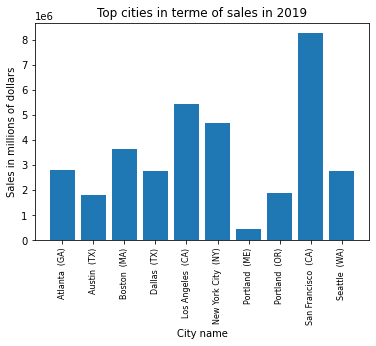

In [21]:
key = [city for city, df in sales.groupby(['City'])]
plt.bar(key,sales.groupby(['City']).sum()['order_value'])
plt.xticks(key, rotation='vertical', size=8)
plt.title("Top cities in terme of sales in 2019")
plt.ylabel('Sales in millions of dollars')
plt.xlabel('City name')
plt.show()

### Interpretation: 
We notice that San Fransisco is by far the best selling city in term of electronic goods in 2019 and that's is explainable by the fact of the city is capitale of technology and innovation.

### Question 2: Which month has the best sales?
#### Code:

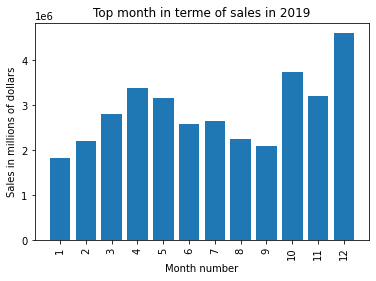

In [22]:
key = [months for months, df in sales.groupby(['month'])]
plt.bar(key,sales.groupby(['month']).sum()['order_value'])
plt.xticks(key, rotation='vertical')
plt.title("Top month in terme of sales in 2019")
plt.ylabel('Sales in millions of dollars')
plt.xlabel('Month number')
plt.show()

### Interpretation:  

We notice that there is a spike in sales starting November, I believe this spike is because of the sales offers on the Black Friday occasion plus the Cyber Monday as well that is dedicated to just electronic goods, then the best selling month is December and that's because the technology gets old so it needs a destocking politic in order to make room for the next generation of the same item.

### Question 3: Which hour of the day has the best sales?
#### Code:

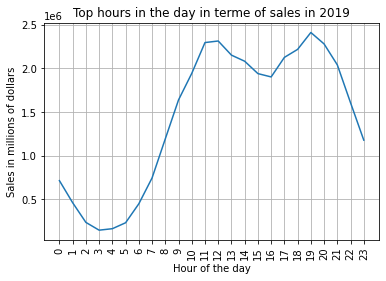

In [23]:
key = [hours for hours, df in sales.groupby(['hour'])]
plt.plot(key,sales.groupby(['hour']).sum()['order_value'])
plt.xticks(key, rotation='vertical')
plt.title("Top hours in the day in terme of sales in 2019")
plt.ylabel('Sales in millions of dollars')
plt.xlabel('Hour of the day')
plt.grid()
plt.show()

### Interpretation: 
We see that the best part of the day in terms of sales is between 11 am and 12 pm, also 19 pm, we can use this information in our marketing campaign the way that could direct our advertising time display.

### Question 4: Which products have the best sales?
#### Code:

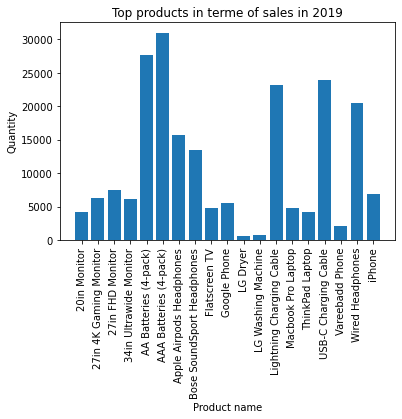

In [24]:
key = [products for products, df in sales.groupby(['product'])]
plt.bar(key,sales.groupby(['product']).sum()['quantity'])
plt.xticks(key, rotation='vertical')
plt.title("Top products in terme of sales in 2019")
plt.ylabel('Quantity')
plt.xlabel('Product name')
plt.show()

### Interpretation: 
Well, the first thought I had when I saw this graph is these good-selling gadgets are cheap so, let's see in the next code validity of this assumption.


#### Code:

<ipython-input-32-a6ca232b394e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation='vertical', size=8)
<ipython-input-32-a6ca232b394e>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


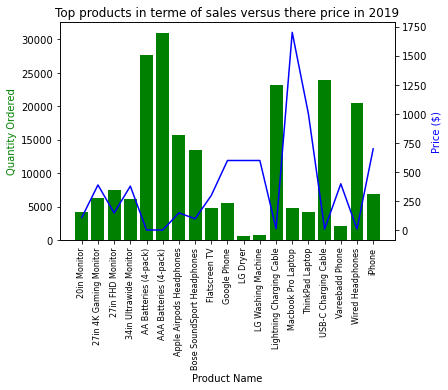

In [32]:
key = [products for products, df in sales.groupby(['product'])]
prices = sales.groupby('product').mean()['unit_price']
quantity_oredred = sales.groupby('product').sum()['quantity']
fig, ax1 = plt.subplots()
       
ax2 = ax1.twinx()

ax1.bar(key,quantity_oredred, color='g')
ax2.plot(key, prices, color='b')
plt.title("Top products in terme of sales versus there price in 2019")      
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(key, rotation='vertical', size=8)

fig.show()

### Interpretation:  
I think now we can see clearly the correlation between price and product sales.

### Question 5: Which products are sold together? 
#### Code:

In [26]:
cart = sales[sales['order_id'].duplicated(keep=False)]

In [27]:
cart['group'] = cart.groupby('order_id')['product'].transform(lambda x: ','.join(x))

<ipython-input-27-4b7e3559addc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart['group'] = cart.groupby('order_id')['product'].transform(lambda x: ','.join(x))


In [28]:
cart = cart[['order_id', 'group']].drop_duplicates()


In [29]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in cart['group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for keys,value in count.most_common(10):
    print(keys, value)
  


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Interpretation:  
This information is really useful for us so we can offer some kind of discount on these product couples.
